### Data Set Information:

#### Link of the dataset : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.


### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
#### Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
#### FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
forest_data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
forest_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
forest_data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
# Cloning the original dataset
df = forest_data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
# Categorizing the dataset into two halves for two regions for better visulization
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [9]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244,246.000000
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9,NaN
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.504065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [10]:
df.describe()

,Region
count,246.000000
mean,1.504065
std,0.501003
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [11]:
df.shape

(246, 15)

In [12]:
df[df.isnull().any(axis=1)] #Checking the row containing the NaN values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,2


In [13]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [15]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [16]:
df =df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [17]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [18]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [19]:
#removing 122th column
df1 = df.drop(122).reset_index(drop=True)
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [20]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [23]:
# define numerical & categorical columns
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']

We have 8 categorical features : ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [24]:
# Changing the existing data types into the required data types for the some features for better EDA
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [25]:
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [26]:
df1["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

<AxesSubplot:>

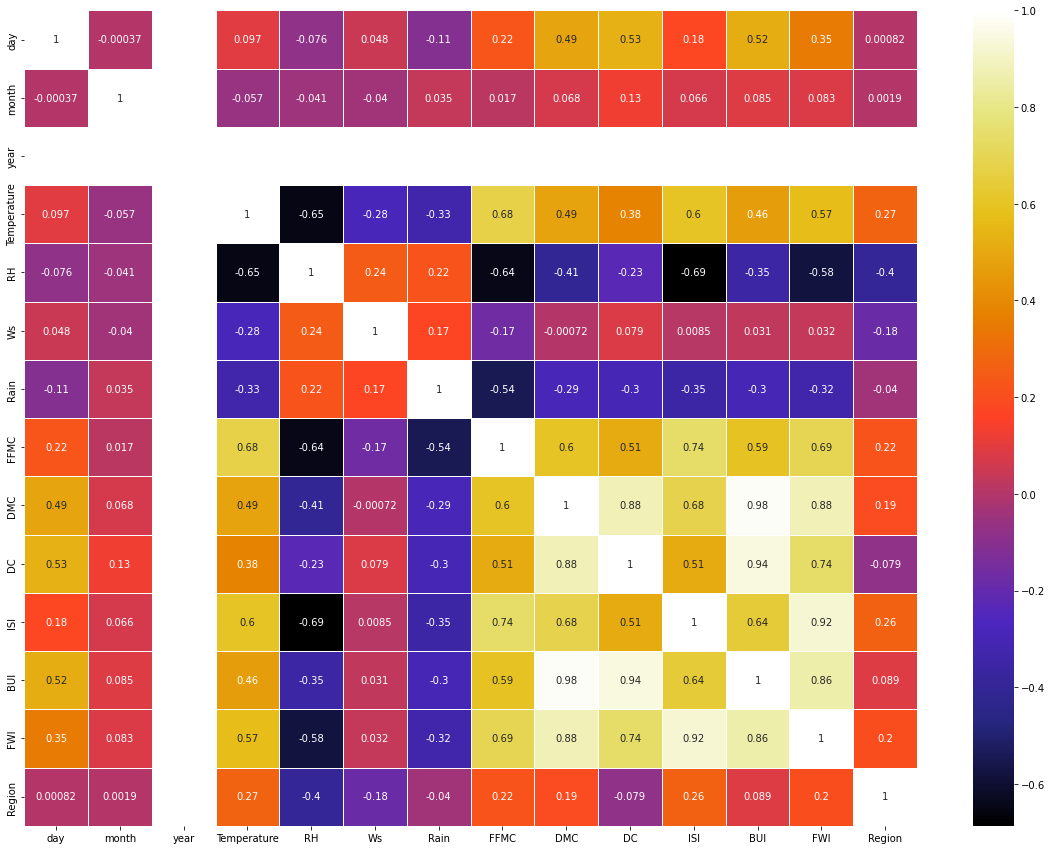

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "CMRmap",xticklabels="auto", yticklabels="auto")

In [28]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [29]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [30]:
df1.to_csv('Algerian_forest_fire_cleaned-data.csv', index=False)

In [31]:
corr = df.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:         Region
Region     1.0


In [32]:
corr = df1.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:                   day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI       

Plotting correlation:


<AxesSubplot:>

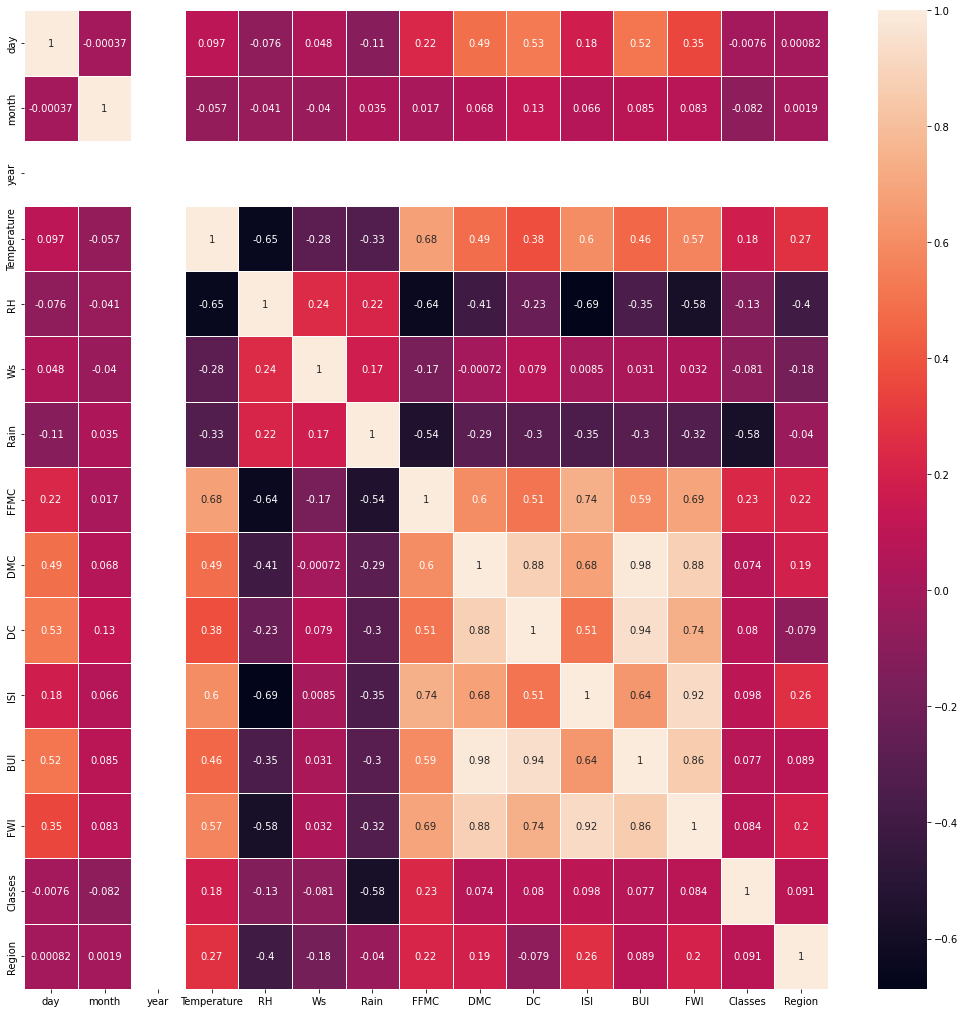

In [33]:
f,ax = plt.subplots(figsize=(18, 18))
print("Plotting correlation:")
sns.heatmap(corr,annot= True, linewidths=.5)

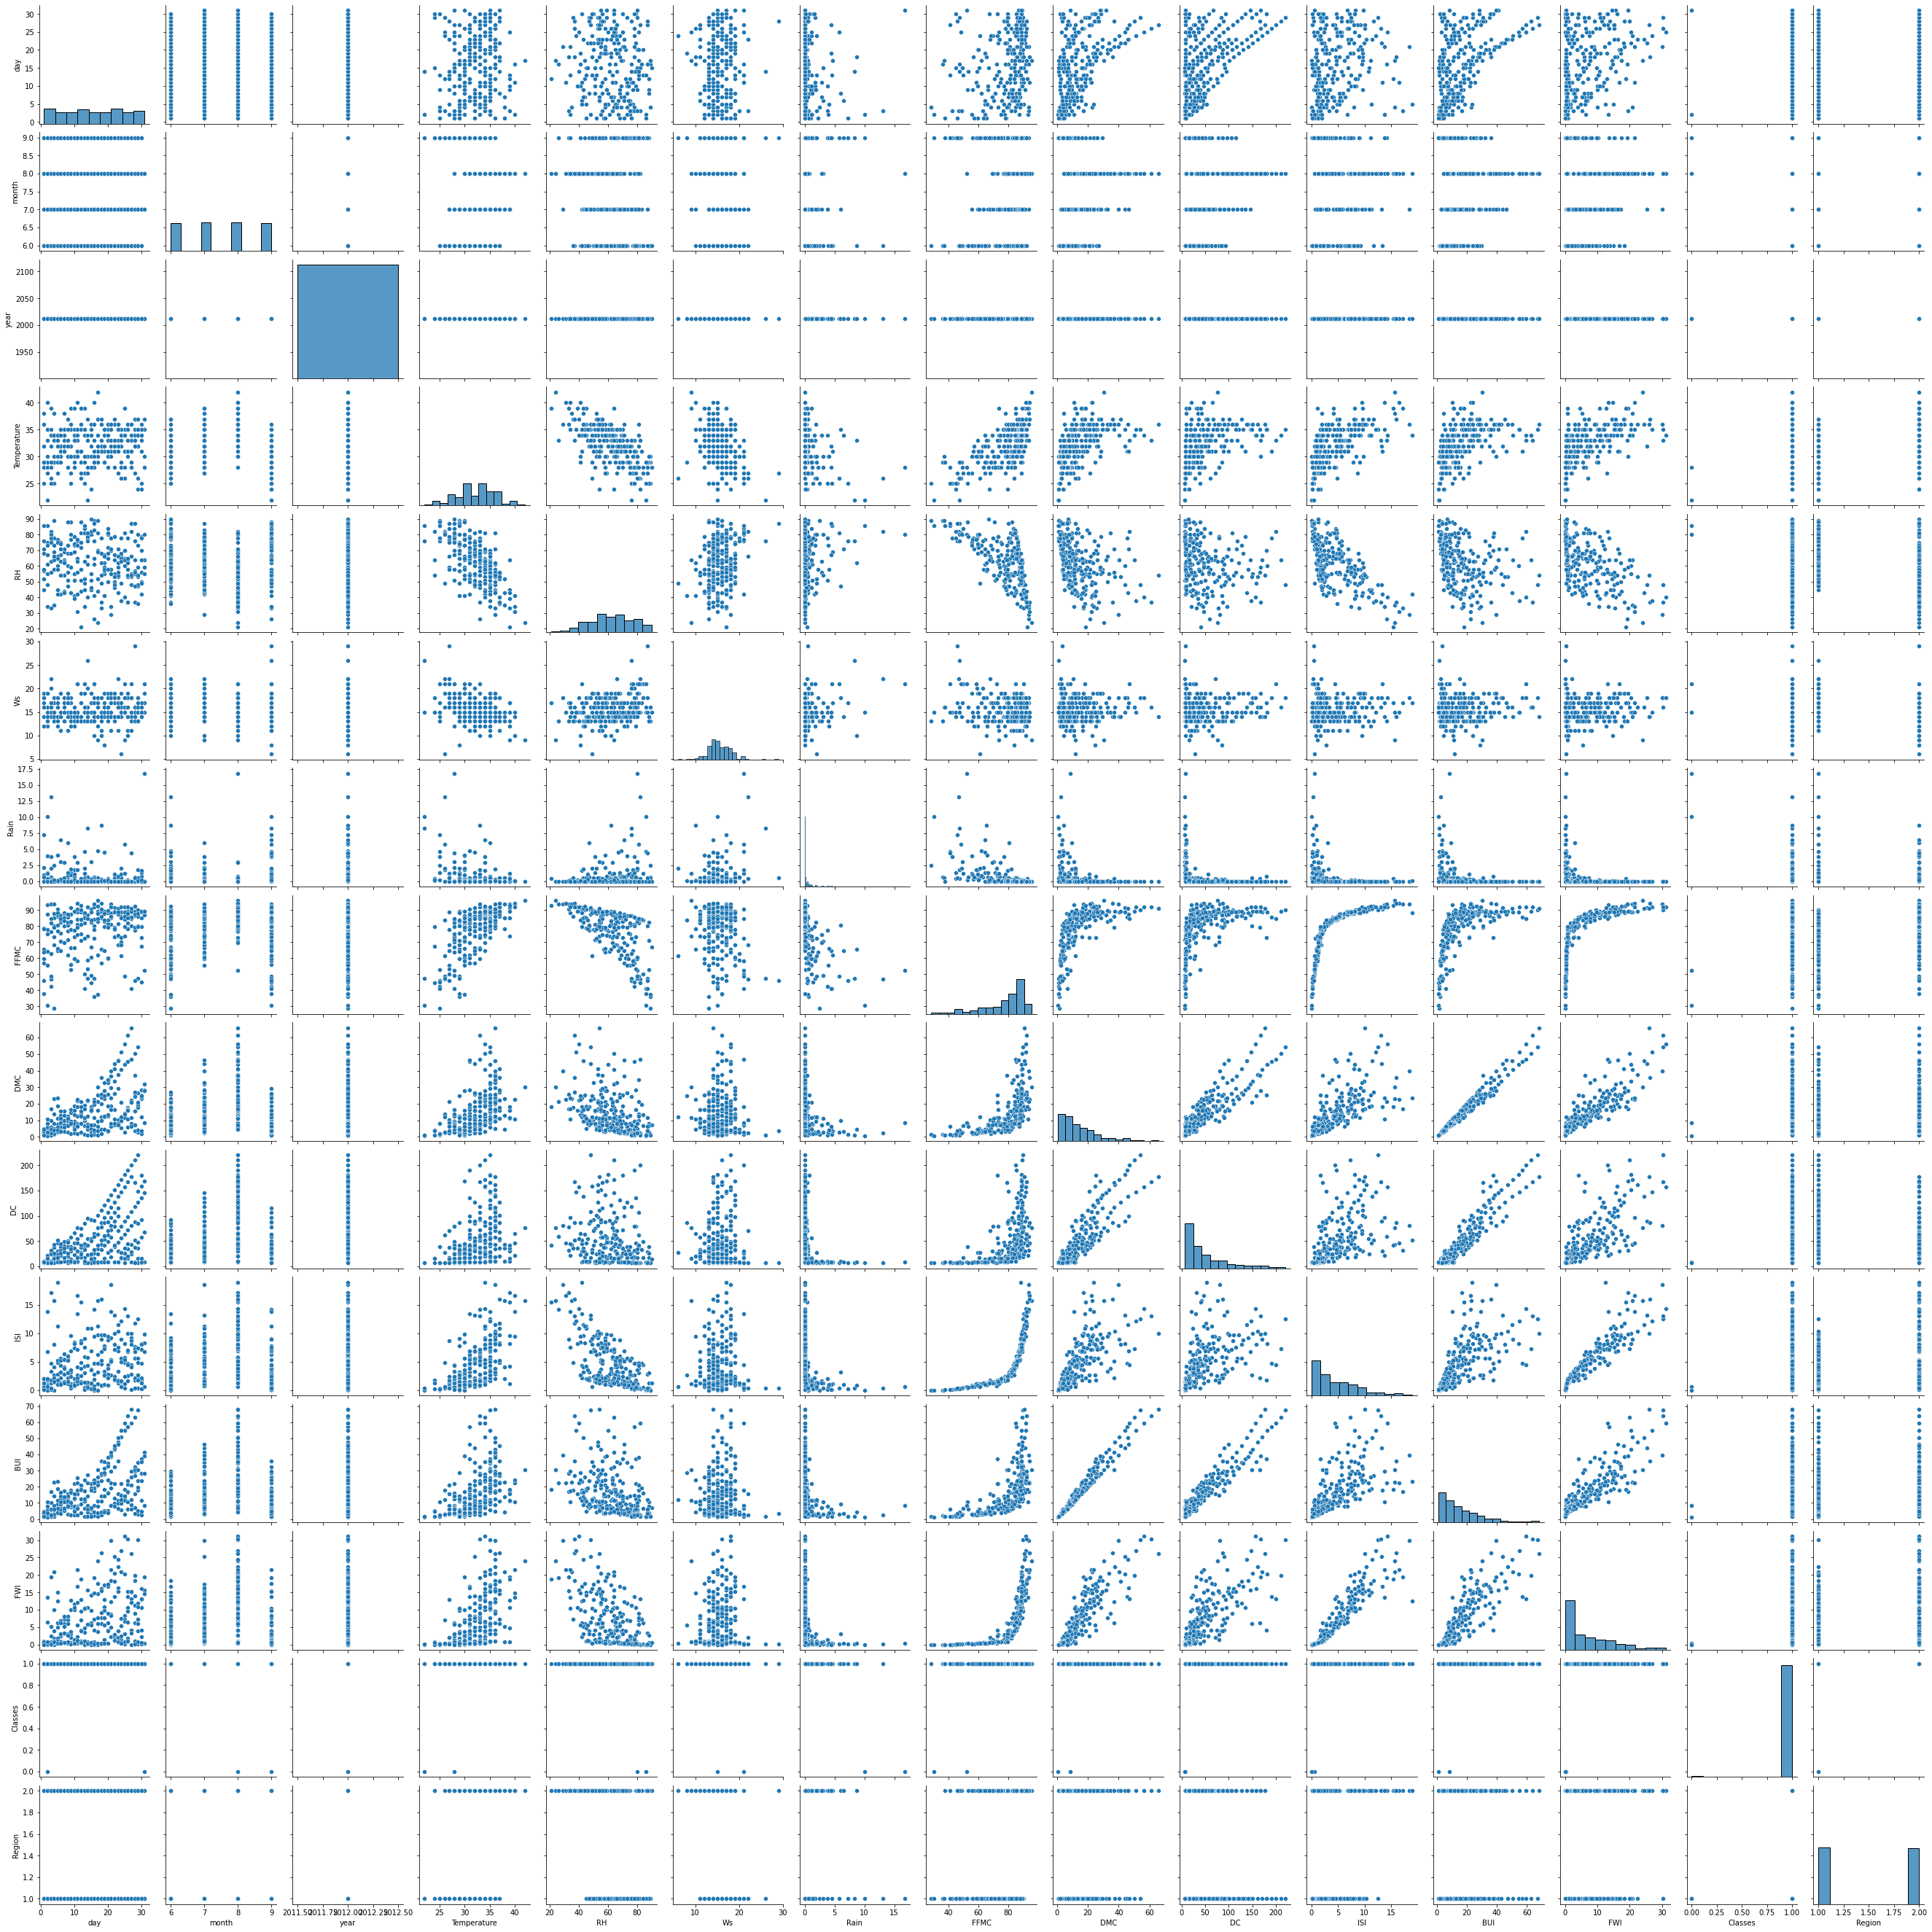

In [34]:
sns.pairplot(df1)

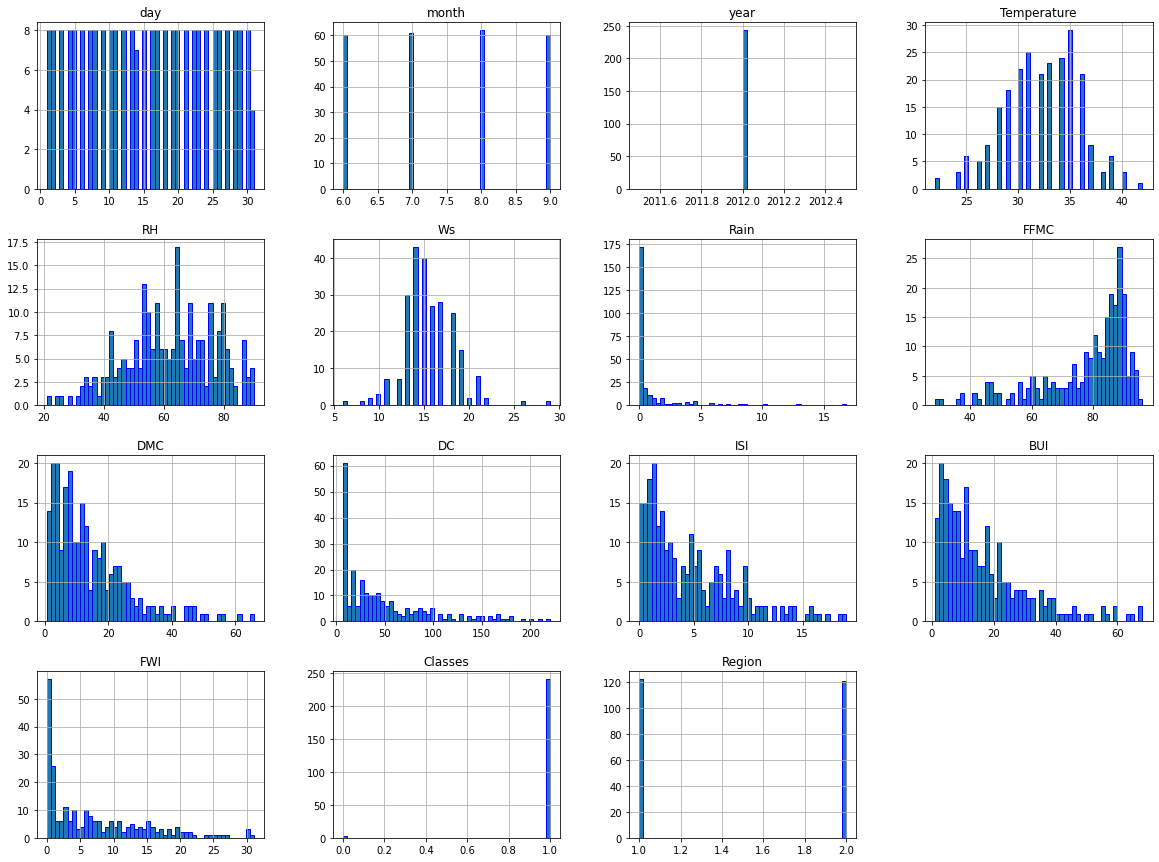

In [35]:
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

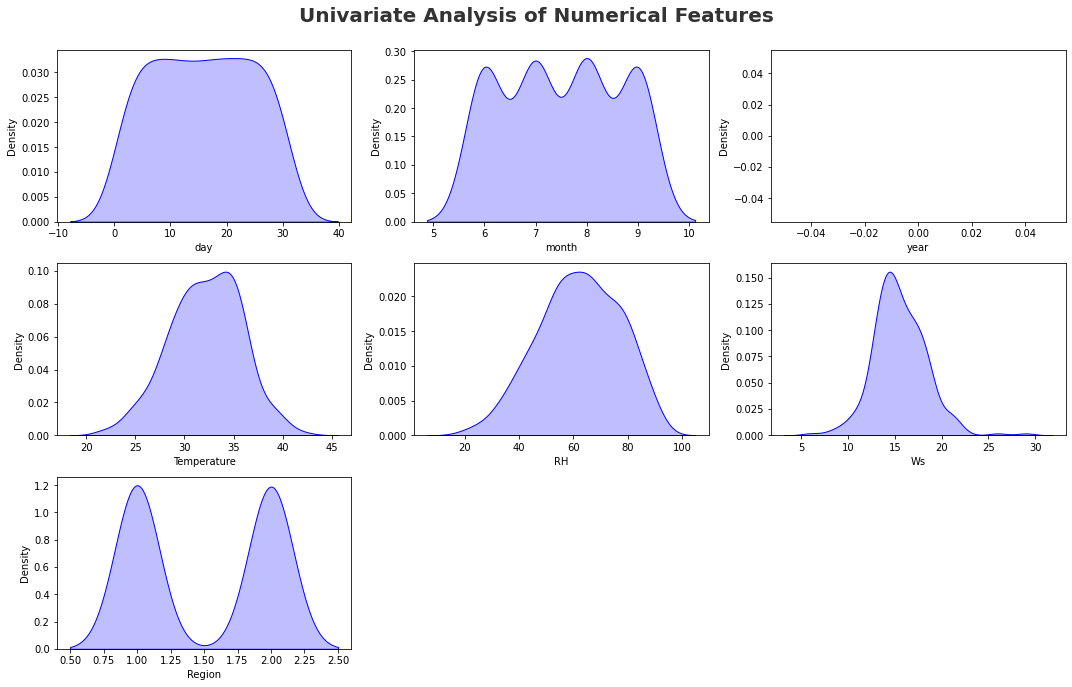

In [36]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold', alpha=0.8, y=1)
for i in range(0,len(numeric_features)):
 plt.subplot(5,3,i+1)
 sns.kdeplot(x=df1[numeric_features[i]],shade=True,color='b')
 plt.xlabel(numeric_features[i])
 plt.tight_layout()


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.0 KB


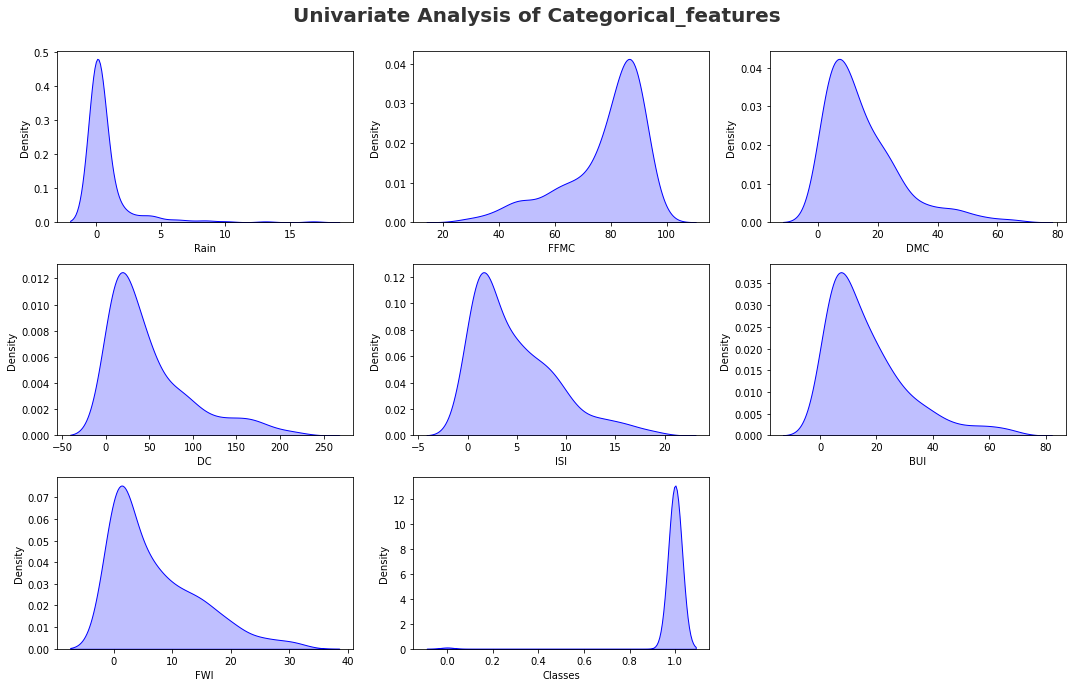

In [38]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical_features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(categorical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[categorical_features[i]],shade=True, color='b')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

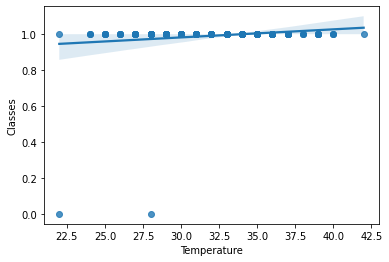

In [39]:
sns.regplot(data=df1,x="Temperature",y="Classes")

<AxesSubplot:xlabel='Temperature', ylabel='Region'>

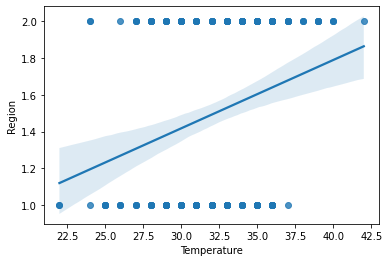

In [40]:
sns.regplot(data=df1,x="Temperature",y="Region")

<AxesSubplot:xlabel='RH', ylabel='Classes'>

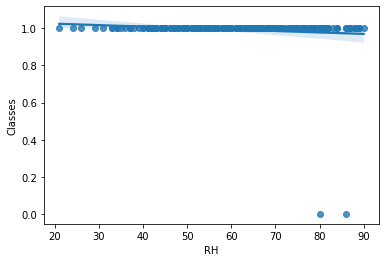

In [41]:
sns.regplot(data=df1,x="RH",y="Classes")

<AxesSubplot:xlabel='Ws', ylabel='Classes'>

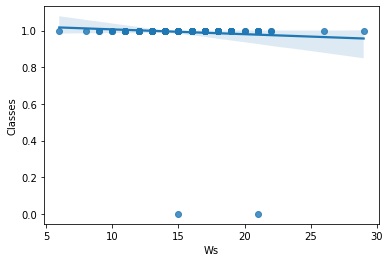

In [42]:
sns.regplot(data=df1,x="Ws",y="Classes")

In [43]:
fire_data = df1.values

X = df1.iloc[:,[4,5,6,7,8,9,10,11,12,13,14]]
Y = df1['Temperature']

In [44]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
238,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,2
240,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,2
241,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,2


In [45]:
Y

0      29
1      29
2      26
3      25
4      27
       ..
238    30
239    28
240    27
241    24
242    24
Name: Temperature, Length: 243, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=20)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [48]:
print("---------------------------------------------Linear Regression-----------------------------------------------")
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_prediction = LR.predict(X_test)
score = explained_variance_score(y_test, LR_prediction)
mae = mean_absolute_error(LR_prediction, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

---------------------------------------------Linear Regression-----------------------------------------------
Score: 0.5251004604498852
Mean Absolute Error: 2.077124666699029


In [49]:
print(LR.intercept_)

28.184265839041736


In [50]:
print(LR.coef_)

[-0.06746213 -0.25284727  0.08301739  0.07893208 -0.03144021  0.01369642
  0.04330166 -0.01305109  0.07763058  4.89642945  0.10477162]


Text(0, 0.5, 'Test Predicted Data')

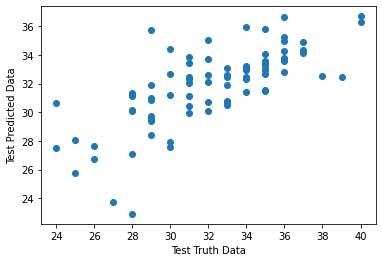

In [51]:
plt.scatter(y_test,LR_prediction)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

<AxesSubplot:xlabel='Temperature'>

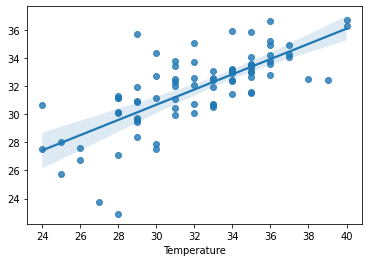

In [52]:
sns.regplot(y_test,LR_prediction)

In [53]:
from sklearn.metrics import r2_score
R2_score=R2_score=r2_score(y_test,LR_prediction)
print(R2_score)

0.5181357540889069


In [54]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.44131681633496456

In [55]:
print("----------------------------------------------Lasso Regression------------------------------------------------")
lasso = Lasso()
lasso.fit(X_train,y_train)
prediction_lasso = lasso.predict(X_test)
score = explained_variance_score(y_test, prediction_lasso)
mae = mean_absolute_error(prediction_lasso,y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

----------------------------------------------Lasso Regression------------------------------------------------
Score: 0.5473657539905131
Mean Absolute Error: 1.9981009005938106


In [56]:
from sklearn.metrics import r2_score
R2_score_lasso=r2_score(y_test,prediction_lasso)
print(R2_score_lasso)

0.5420886960810642


In [57]:
print(lasso.intercept_)

31.386610759759506


In [58]:
print(lasso.coef_)

[-0.08738572 -0.06992637 -0.          0.08566883  0.          0.01039541
  0.          0.          0.          0.          0.        ]


Text(0, 0.5, 'Test Predicted Data')

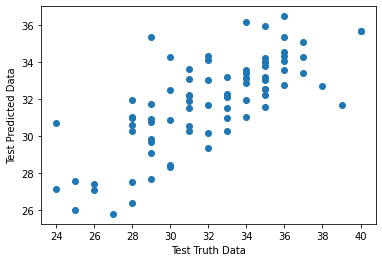

In [59]:
plt.scatter(y_test,prediction_lasso)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

<AxesSubplot:xlabel='Temperature'>

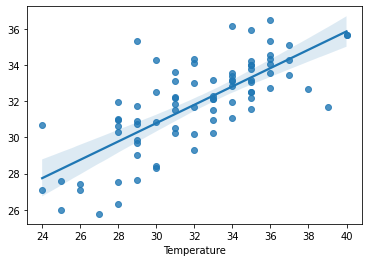

In [60]:
sns.regplot(y_test,prediction_lasso)

In [61]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.46908834328239335

In [62]:
print("------------------------------------------------Ridge Regression--------------------------------------------------")
ridge = Ridge()
ridge.fit(X_train,y_train)
prediction_ridge = ridge.predict(X_test)
score = explained_variance_score(y_test, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------Ridge Regression--------------------------------------------------
Score: 0.5407207215265188
Mean Absolute Error: 2.0518549452316552


In [63]:
from sklearn.metrics import r2_score
R2_score_ridge=r2_score(y_test,prediction_ridge)
print(R2_score_ridge)

0.5338298995162152


In [64]:
print(ridge.intercept_)

30.827339285335093


In [65]:
print(ridge.coef_)

[-0.06986275 -0.24000484  0.02620679  0.08070387 -0.04336237  0.01113543
  0.02869216  0.00527613  0.07690343  2.12469152  0.12606661]


In [66]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.459512926975322

In [67]:
print("------------------------------------------------Ridge Regression--------------------------------------------------")
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
prediction_elasticnet = elasticnet.predict(X_test)
score = explained_variance_score(y_test, prediction_elasticnet)
mae = mean_absolute_error(prediction_elasticnet,y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------Ridge Regression--------------------------------------------------
Score: 0.5542472865849989
Mean Absolute Error: 1.99767078533837


In [68]:
print(elasticnet.intercept_)

32.03996758251205


In [69]:
print(elasticnet.coef_)

[-0.08152874 -0.13661156 -0.          0.08499115  0.          0.0081089
  0.          0.          0.02572269  0.          0.        ]


In [70]:
from sklearn.metrics import r2_score
R2_score_elasticnet=r2_score(y_test,prediction_elasticnet)
print(R2_score_elasticnet)

0.5488150926085771


In [71]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score_elasticnet)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.47688706389400237

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train)

In [74]:
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled

array([[-1.21894177,  0.15920239, -0.38206865, ...,  2.28258606,
         0.07881104,  1.01242284],
       [-0.95459295,  0.92907663,  3.02813084, ..., -0.60799249,
         0.07881104,  1.01242284],
       [-0.02937209,  0.92907663, -0.21155867, ..., -0.44665787,
         0.07881104, -0.9877296 ],
       ...,
       [ 1.82106964, -0.99560898,  0.01578796, ..., -1.01132903,
         0.07881104, -0.9877296 ],
       [ 0.63149995, -0.61067185,  3.31231413, ..., -0.95755083,
         0.07881104,  1.01242284],
       [ 0.76367436,  0.54413951,  0.12946128, ..., -0.95755083,
         0.07881104, -0.9877296 ]])

In [76]:
X_test_scaled

array([[-1.35111618e+00, -2.92029459e+00, -3.25231988e-01,
         3.79910289e-01,  8.32500109e-01,  7.93655659e-01,
        -5.53570332e-01,  8.59789461e-01, -2.58434154e-01,
         7.88110406e-02,  1.01242284e+00],
       [-1.68155220e+00, -9.95608976e-01, -4.10486975e-02,
         5.37895304e-01,  2.49965786e-01, -2.92020260e-01,
        -6.56826974e-02,  5.73430974e-02, -4.33213322e-02,
         7.88110406e-02,  1.01242284e+00],
       [ 8.95848772e-01, -6.10671854e-01, -3.82068646e-01,
         5.51633131e-01, -1.57808240e-01, -2.39167883e-01,
         2.72482806e-02, -2.02909777e-01, -9.70995377e-02,
         7.88110406e-02, -9.87729597e-01],
       [-1.15285457e+00,  5.44139512e-01, -2.68395330e-01,
         4.96681822e-01, -4.15787726e-01, -4.63790487e-01,
         7.37137696e-02, -4.55933405e-01, -2.04655949e-01,
         7.88110406e-02,  1.01242284e+00],
       [ 1.35845920e+00, -2.25734732e-01, -1.54722014e-01,
        -2.29896605e+00, -1.16476043e+00, -9.39461883e-01,
  

In [77]:
print("---------------------------------------------Linear Regression with Scaled Data-----------------------------------------------")
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)
LR_prediction = LR.predict(X_test_scaled)
score = explained_variance_score(y_test, LR_prediction)
mae = mean_absolute_error(LR_prediction, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

---------------------------------------------Linear Regression with Scaled Data-----------------------------------------------
Score: 0.5251004604498851
Mean Absolute Error: 2.077124666699029


Text(0, 0.5, 'Test Predicted Data')

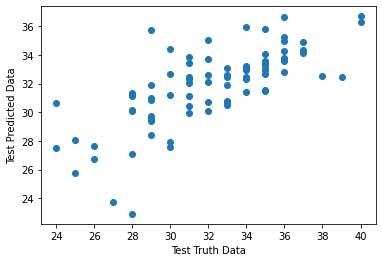

In [78]:
plt.scatter(y_test,LR_prediction)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

Text(0, 0.5, 'Test Predicted Data')

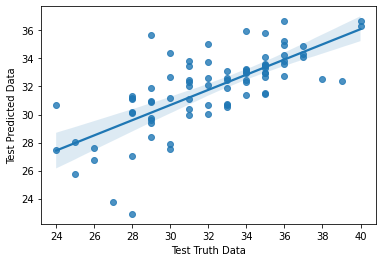

In [79]:
sns.regplot(y_test,LR_prediction)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [80]:
print("------------------------------------------------Ridge Regression with Scaled Data----------------------------------------------")
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
prediction_ridge = ridge.predict(X_test_scaled)
score = explained_variance_score(y_test, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------Ridge Regression with Scaled Data----------------------------------------------
Score: 0.5266043886094838
Mean Absolute Error: 2.0749264622451857


Text(0, 0.5, 'Test Predicted Data')

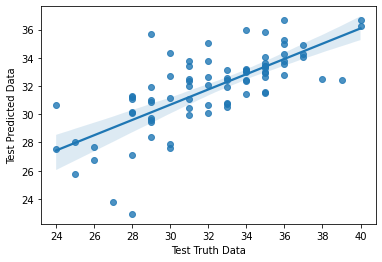

In [81]:
sns.regplot(y_test,prediction_ridge)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [82]:
print(ridge.coef_)

[-1.0193518  -0.65208018  0.13671987  1.12530659 -0.37463562  0.55848354
  0.25083123 -0.06646846  0.47865265  0.38001622  0.04529692]


In [83]:
print(ridge.intercept_)

32.160493827160494


In [84]:
print("-------------------------------------ElasticNet Regression with Scaled Data--------------------------------------------------")
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
prediction_elasticnet = elasticnet.predict(X_test_scaled)
score = explained_variance_score(y_test, prediction_elasticnet)
mae = mean_absolute_error(prediction_elasticnet,y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

-------------------------------------ElasticNet Regression with Scaled Data--------------------------------------------------
Score: 0.46022751134240514
Mean Absolute Error: 2.1962111877558033


Text(0, 0.5, 'Test Predicted Data')

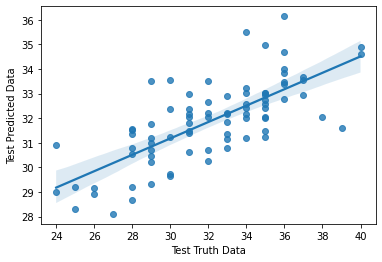

In [85]:
sns.regplot(y_test,prediction_elasticnet)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [86]:
print(elasticnet.coef_)

[-0.61517078 -0.14551371 -0.          0.681168    0.06881693  0.
  0.31601238  0.05575822  0.28438594  0.          0.        ]


In [87]:
print(elasticnet.intercept_)

32.160493827160494


In [88]:
print("------------------------------------------------Lasso Regression with Scaled Data----------------------------------------------")
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
prediction_lasso = lasso.predict(X_test_scaled)
score = explained_variance_score(y_test, prediction_lasso)
mae = mean_absolute_error(prediction_lasso, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------Lasso Regression with Scaled Data----------------------------------------------
Score: 0.4254195370595677
Mean Absolute Error: 2.281791782925127


Text(0, 0.5, 'Test Predicted Data')

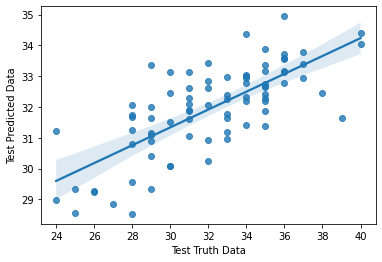

In [89]:
sns.regplot(y_test,prediction_lasso)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [90]:
print(lasso.coef_)

[-0.66167174 -0.         -0.          0.93435406  0.          0.
  0.          0.          0.12295451  0.          0.        ]


In [91]:
print(lasso.intercept_)

32.160493827160494
